# Лабораторная работа №1

## Логистическая регрессия в качестве нейронной сети

В работе предлагается использовать набор данных _notMNIST_, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (_A_ ... _J_, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

Данные можно скачать по ссылке:

* https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);

* https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);

Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

### Задание 1

Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python.

In [0]:
SMALL_DS_URL = 'https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz'
LARGE_DS_URL = 'https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz'

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

In [0]:
from urllib.request import urlretrieve
import tarfile
import os

def tar_to_dir(_tar_url, _key):

    local_file_name_ = 'dataset_' + _key + '.f'    
    dir_name_ = 'dataset_' + _key

    urlretrieve(_tar_url, local_file_name_)

    tar = tarfile.open(local_file_name_)
    tar.extractall(dir_name_)

    os.remove(local_file_name_)

    return dir_name_

In [0]:
from glob import glob

def get_subdirs(_dir_name):

    inner_dir_ = [x[0] for x in os.walk(_dir_name)][1]

    subdir_pattern_ = os.path.join(inner_dir_, '*')

    level_3_ = sorted(glob(subdir_pattern_))

    return level_3_

In [0]:
import cv2
import os
import shutil

def subdirs_to_img_dict(_subdirs, _dir_name, _img_dict):

    for subdir_ in _subdirs:
        images_ = []

        for imagefile_ in os.listdir(subdir_):
            imagepath_ = os.path.join(subdir_, imagefile_)

            images_.append(cv2.imread(imagepath_))

        key_ = os.path.basename(os.path.normpath(subdir_))
        
        _img_dict[key_] = images_

    shutil.rmtree(_dir_name)

In [0]:
import random

def get_examples(_img_dict):

    examples_ = []

    for v in _img_dict.values():
        examples_.append(v[random.randrange(len(v))])

    return examples_

In [0]:
def print_examples(_examples):

    fig = plt.figure(figsize=(16, 6))

    for i, img in enumerate(_examples):
        ax = fig.add_subplot(2, 5, i + 1)
        ax.axis('off')
        ax.imshow(img)

    plt.show()

In [0]:
def tar_to_img_dict(_tar_url, _img_dict, _key):
    
    dir_name_ = tar_to_dir(_tar_url, _key)

    subdirs_ = get_subdirs(dir_name_)

    subdirs_to_img_dict(subdirs_, dir_name_, _img_dict)

    examples_ = get_examples(_img_dict)

    print_examples(examples_)

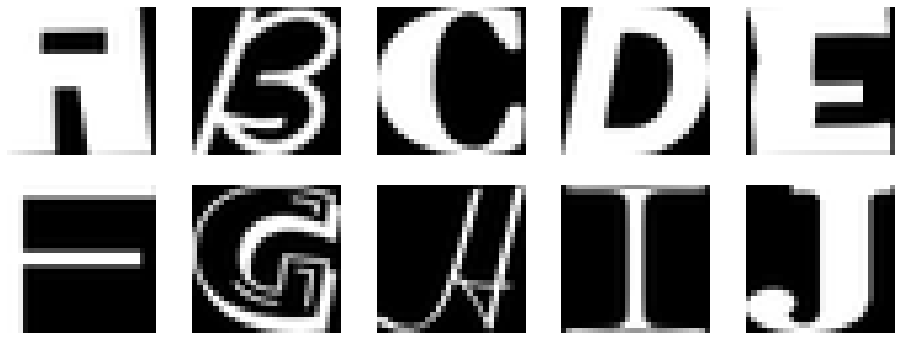

In [9]:
small_imgs = {}

tar_to_img_dict(SMALL_DS_URL, small_imgs, 'small')

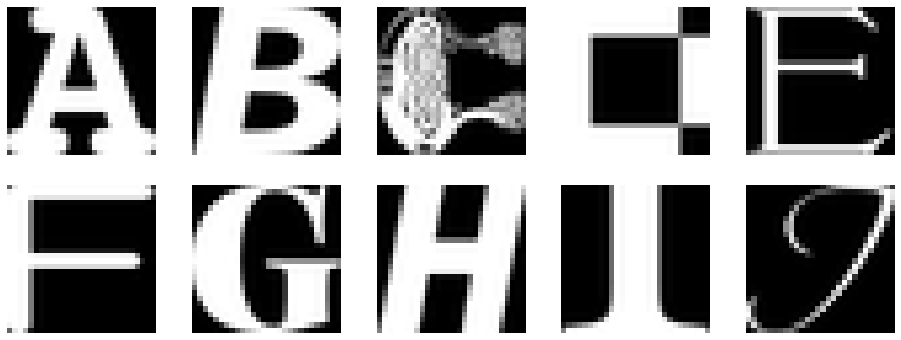

In [10]:
large_imgs = {}

tar_to_img_dict(LARGE_DS_URL, large_imgs, 'large')

### Задание 2

Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (в данной задаче 10 классов).

In [0]:
def print_balance(_dict):
    print(*[k + ': ' + str(len(v)) for k, v in _dict.items()], sep = '    ')

In [12]:
print_balance(small_imgs)

A: 1873    B: 1873    C: 1873    D: 1873    E: 1873    F: 1873    G: 1872    H: 1872    I: 1872    J: 1872


In [13]:
print_balance(large_imgs)

A: 52912    B: 52912    C: 52912    D: 52912    E: 52912    F: 52912    G: 52912    H: 52912    I: 52912    J: 52911


### Задание 3

Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений).

### Задание 4

Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

### Задание 5

Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку _SkLearn_ (http://scikit-learn.org).